In [1]:
## This code can be used to study the impact of model complexity on forecasting error
import numpy as np
import torch
import torch.utils.data as torchdata
import pandas as pd

df = pd.read_csv('data/uci_electricity/LD2011_2014.txt', sep = ';', parse_dates=[0], infer_datetime_format=True, dtype='float32', decimal=',', index_col=[0])
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048365,1.73762,150.406509,85.365852,303.571442,11.305822,282.828278,68.181816,72.043015,...,276.945038,28200.0,1616.033813,1363.636353,29.986961,5.851375,697.102722,176.961609,651.026367,7621.621582
2014-12-31 23:15:00,2.538071,21.337126,1.73762,166.666672,81.707314,324.404755,11.305822,252.525253,64.685318,72.043015,...,279.800140,28300.0,1569.620239,1340.909058,29.986961,9.947337,671.641785,168.614365,669.354858,6702.702637
2014-12-31 23:30:00,2.538071,20.625889,1.73762,162.601624,82.926826,318.452393,10.175241,242.424240,61.188812,74.193550,...,284.796570,27800.0,1556.962036,1318.181763,27.379400,9.362200,670.763855,153.589310,670.087952,6864.864746
2014-12-31 23:45:00,1.269036,21.337126,1.73762,166.666672,85.365852,285.714294,10.175241,225.589218,64.685318,72.043015,...,246.252670,28000.0,1443.037964,909.090881,26.075619,4.095963,664.618103,146.911514,646.627563,6540.540527


In [2]:
df = df.resample('H').mean()

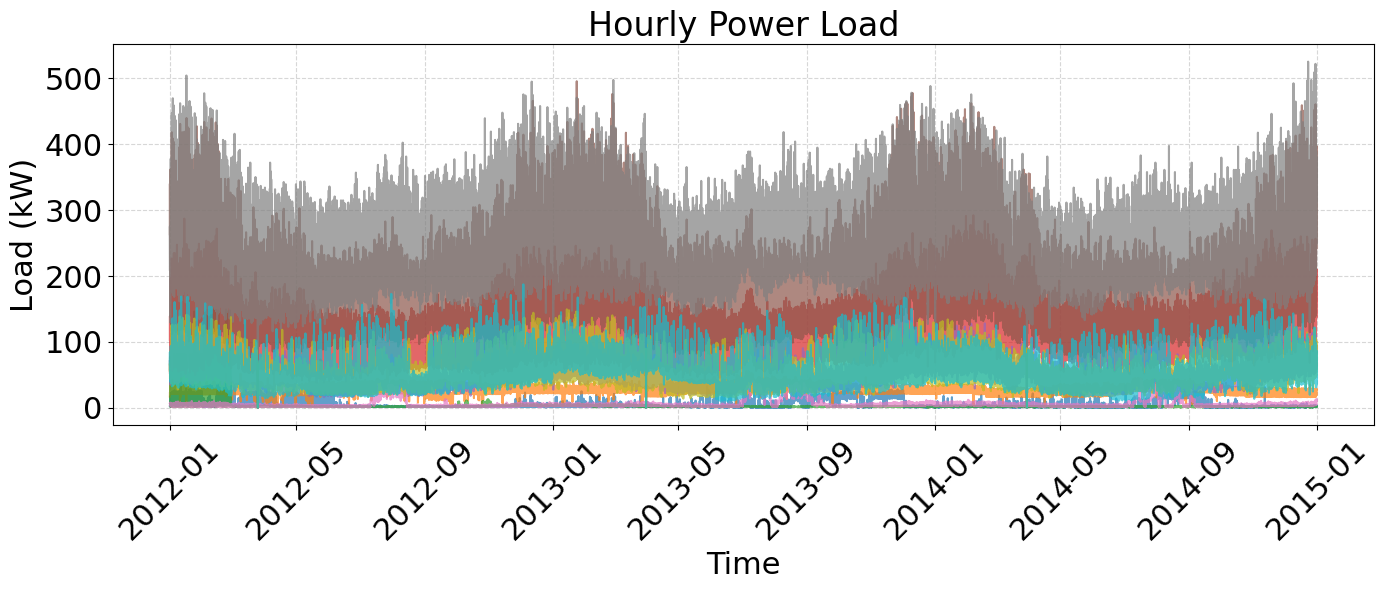

In [3]:
## plotting the dataset time series
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to exclude entries before 2012
df_filtered = df[df.index >= '2012-01-01']

# Select a subset of columns for clarity (e.g., first 10)
subset = df_filtered.iloc[:, :10]

# Reset index to use datetime as a column for plotting
df_hourly_reset = subset.reset_index()

# Melt the DataFrame for long format
df_melted = df_hourly_reset.melt(id_vars='index', var_name='Columns', value_name='Values')

# Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_melted, 
    x='index', 
    y='Values', 
    hue='Columns', 
    palette='tab10', 
    alpha=0.7,  # Add transparency
    linewidth=1.5  # Increase line thickness
)

# Customize the plot
plt.title("Hourly Power Load", fontsize=24)
plt.xlabel("Time", fontsize=22)
plt.ylabel("Load (kW)", fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
#plt.legend(title="Columns", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Place legend outside
plt.legend([], [], frameon=False)

plt.grid(True, linestyle='--', alpha=0.5)  # Add a dashed grid for readability
plt.tight_layout()
plt.savefig("hourly_power_load.jpeg", format="jpeg", dpi=300)  # High-quality image

plt.show()


In [4]:
data = {
    "Model": [
        "Seasonal naive", "ETS", "Theta", "LightGBM", "DeepAR", "GRU", 
        "ML-RNN", "TCN", "WaveNet", "BiTCN", "TransformerConv", "Deep-BiTCN-Att-Skip"
    ],
    "sMAPE": [0.112, 0.201, 0.177, 0.089, 0.1, 0.1, 0.114, 0.099, 0.093, 0.089, 0.084, 0.088],
    "NRMSE": [0.719, 1.755, 1.575, 0.679, 0.659, 0.665, 0.815, 0.666, 0.636, 0.641, 0.66, 0.62],
    "ND": [None, None, None, None, 0.068, 0.0684, 0.084, 0.066, 0.063, 0.0631, 0.062, 0.0613],
    "RMSE": [None, None, None, None, 1752.0, 1768.0, 2168.0, 1772.0, 1694.0, 1705.0, 1755.0, 1667.0],
    "MAPE": [None, None, None, None, 0.129, 0.145, 0.139, 0.127, 0.106, 0.106, 0.105, 0.0978],
    "Q(0.5)": [0.078, 0.152, 0.141, 0.065, 0.067, 0.068, 0.084, 0.067, 0.063, 0.063, 0.062, 0.0613],
    "mQ": [0.078, 0.136, 0.164, 0.077, 0.056, 0.056, 0.066, 0.056, 0.052, 0.052, 0.052, 0.051],
    "sMAPE_std": [None, None, None, None, 0.006, 0.004, 0.0023, 0.0041, 0.0035, 0.0018, 0.0009, 0.0024],
    "NRMSE_std": [None, None, None, None, 0.0128, 0.004, 0.046, 0.012, 0.01, 0.007, 0.011, 0.0058],
    "ND_std": [None, None, None, None, 0.0013, 0.0014, 0.0016, 0.0013, 0.001, 0.0005, 0.0004, 0.00087],
    "RMSE_std": [None, None, None, None, 34.23, 11.1, 123.07, 32.64, 27.51, 18.87, 31.27, 15.61],
    "MAPE_std": [None, None, None, None, 0.011, 0.007, 0.006, 0.0043, 0.006, 0.0042, 0.007, 0.0129],
    "Q(0.5)_std": [None, None, None, None, 0.0013, 0.0014, 0.0016, 0.0013, 0.001, 0.0005, 0.0004, 0.0008],
    "mQ_std": [None, None, None, None, 0.0009, 0.0011, 0.0012, 0.001, 0.008, 0.0004, 0.0002, 0.0006]
}


data = {
    "Model": [
        "Seasonal naive", "ETS", "Theta", "LightGBM", "DeepAR", "GRU", 
        "ML-RNN", "TCN", "WaveNet", "BiTCN", "TransformerConv", "Deep-BiTCN-Att-Skip"
    ],
    "sMAPE": [0.112, 0.201, 0.177, 0.089, 0.1, 0.1, 0.114, 0.099, 0.093, 0.089, 0.084, 0.0938],
    "NRMSE": [0.719, 1.755, 1.575, 0.679, 0.659, 0.665, 0.815, 0.666, 0.636, 0.641, 0.66, 0.4981],
    "ND": [None, None, None, None, 0.068, 0.0684, 0.084, 0.066, 0.063, 0.0631, 0.062, 0.0588],
    "RMSE": [None, None, None, None, 1752.0, 1768.0, 2168.0, 1772.0, 1694.0, 1705.0, 1755.0, 1301.48],
    "MAPE": [None, None, None, None, 0.129, 0.145, 0.139, 0.127, 0.106, 0.106, 0.105, 0.0979],
    "Q(0.5)": [0.078, 0.152, 0.141, 0.065, 0.067, 0.068, 0.084, 0.067, 0.063, 0.063, 0.062, 0.0588],
    "mQ": [0.078, 0.136, 0.164, 0.077, 0.056, 0.056, 0.066, 0.056, 0.052, 0.052, 0.052, 0.0487],
    "sMAPE_std": [None, None, None, None, 0.006, 0.004, 0.0023, 0.0041, 0.0035, 0.0018, 0.0009, 0.0033],
    "NRMSE_std": [None, None, None, None, 0.0128, 0.004, 0.046, 0.012, 0.01, 0.007, 0.011, 0.0037],
    "ND_std": [None, None, None, None, 0.0013, 0.0014, 0.0016, 0.0013, 0.001, 0.0005, 0.0004, 0.0004],
    "RMSE_std": [None, None, None, None, 34.23, 11.1, 123.07, 32.64, 27.51, 18.87, 31.27, 9.852],
    "MAPE_std": [None, None, None, None, 0.011, 0.007, 0.006, 0.0043, 0.006, 0.0042, 0.007, 0.0022],
    "Q(0.5)_std": [None, None, None, None, 0.0013, 0.0014, 0.0016, 0.0013, 0.001, 0.0005, 0.0004, 0.0004],
    "mQ_std": [None, None, None, None, 0.0009, 0.0011, 0.0012, 0.001, 0.008, 0.0004, 0.0002, 0.0003]
}

# Example of how to use the updated data in a DataFrame
import pandas as pd

df = pd.DataFrame(data)
print(df)


df = pd.DataFrame(data)
df

                  Model   sMAPE   NRMSE      ND     RMSE    MAPE  Q(0.5)  \
0        Seasonal naive  0.1120  0.7190     NaN      NaN     NaN  0.0780   
1                   ETS  0.2010  1.7550     NaN      NaN     NaN  0.1520   
2                 Theta  0.1770  1.5750     NaN      NaN     NaN  0.1410   
3              LightGBM  0.0890  0.6790     NaN      NaN     NaN  0.0650   
4                DeepAR  0.1000  0.6590  0.0680  1752.00  0.1290  0.0670   
5                   GRU  0.1000  0.6650  0.0684  1768.00  0.1450  0.0680   
6                ML-RNN  0.1140  0.8150  0.0840  2168.00  0.1390  0.0840   
7                   TCN  0.0990  0.6660  0.0660  1772.00  0.1270  0.0670   
8               WaveNet  0.0930  0.6360  0.0630  1694.00  0.1060  0.0630   
9                 BiTCN  0.0890  0.6410  0.0631  1705.00  0.1060  0.0630   
10      TransformerConv  0.0840  0.6600  0.0620  1755.00  0.1050  0.0620   
11  Deep-BiTCN-Att-Skip  0.0938  0.4981  0.0588  1301.48  0.0979  0.0588   

        mQ 

,Model,sMAPE,NRMSE,ND,RMSE,MAPE,Q(0.5),mQ,sMAPE_std,NRMSE_std,ND_std,RMSE_std,MAPE_std,Q(0.5)_std,mQ_std
0,Seasonal naive,0.1120,0.7190,NaN,NaN,NaN,0.0780,0.0780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ETS,0.2010,1.7550,NaN,NaN,NaN,0.1520,0.1360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Theta,0.1770,1.5750,NaN,NaN,NaN,0.1410,0.1640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LightGBM,0.0890,0.6790,NaN,NaN,NaN,0.0650,0.0770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DeepAR,0.1000,0.6590,0.0680,1752.00,0.1290,0.0670,0.0560,0.0060,0.0128,0.0013,34.230,0.0110,0.0013,0.0009
5,GRU,0.1000,0.6650,0.0684,1768.00,0.1450,0.0680,0.0560,0.0040,0.0040,0.0014,11.100,0.0070,0.0014,0.0011
6,ML-RNN,0.1140,0.8150,0.0840,2168.00,0.1390,0.0840,0.0660,0.0023,0.0460,0.0016,123.070,0.0060,0.0016,0.0012
7,TCN,0.0990,0.6660,0.0660,1772.00,0.1270,0.0670,0.0560,0.0041,0.0120,0.0013,32.640,0.0043,0.0013,0.0010
8,WaveNet,0.0930,0.6360,0.0630,1694.00,0.1060,0.0630,0.0520,0.0035,0.0100,0.0010,27.510,0.0060,0.0010,0.0080
9,BiTCN,0.0890,0.6410,0.0631,1705.00,0.1060,0.0630,0.0520,0.0018,0.0070,0.0005,18.870,0.0042,0.0005,0.0004


In [5]:
# Create a copy of the filtered DataFrame
filtered_models=["DeepAR", "GRU", 
        "ML-RNN", "TCN", "WaveNet", "BiTCN", "TransformerConv", "Deep-BiTCN-Att-Skip"]
filtered_df = df[df["Model"].isin(filtered_models)].copy()
# Normalize each metric and its corresponding std metric
metrics = ["sMAPE", "NRMSE", "ND", "RMSE", "MAPE", "Q(0.5)", "mQ"]
std_metrics = [metric + "_std" for metric in metrics]

for metric in metrics:
    # Find the minimum value for the metric
    best_value = filtered_df[metric].max()
    if best_value is not None:
        # Add the scaled metric to the DataFrame
        filtered_df[f"scaled_{metric}"] = filtered_df[metric] / best_value
    else:
        # Handle cases where the metric is None/NaN
        filtered_df[f"scaled_{metric}"] = None

for std_metric in std_metrics:
    # Find the minimum value for the std metric
    best_value = filtered_df[std_metric].max()
    if best_value is not None:
        # Add the scaled std metric to the DataFrame
        filtered_df[f"scaled_{std_metric}"] = filtered_df[std_metric] / best_value
    else:
        # Handle cases where the std metric is None/NaN
        filtered_df[f"scaled_{std_metric}"] = None
filtered_df


,Model,sMAPE,NRMSE,ND,RMSE,MAPE,Q(0.5),mQ,sMAPE_std,NRMSE_std,...,scaled_MAPE,scaled_Q(0.5),scaled_mQ,scaled_sMAPE_std,scaled_NRMSE_std,scaled_ND_std,scaled_RMSE_std,scaled_MAPE_std,scaled_Q(0.5)_std,scaled_mQ_std
4,DeepAR,0.1000,0.6590,0.0680,1752.00,0.1290,0.0670,0.0560,0.0060,0.0128,...,0.889655,0.797619,0.848485,1.000000,0.278261,0.8125,0.278134,1.000000,0.8125,0.1125
5,GRU,0.1000,0.6650,0.0684,1768.00,0.1450,0.0680,0.0560,0.0040,0.0040,...,1.000000,0.809524,0.848485,0.666667,0.086957,0.8750,0.090193,0.636364,0.8750,0.1375
6,ML-RNN,0.1140,0.8150,0.0840,2168.00,0.1390,0.0840,0.0660,0.0023,0.0460,...,0.958621,1.000000,1.000000,0.383333,1.000000,1.0000,1.000000,0.545455,1.0000,0.1500
7,TCN,0.0990,0.6660,0.0660,1772.00,0.1270,0.0670,0.0560,0.0041,0.0120,...,0.875862,0.797619,0.848485,0.683333,0.260870,0.8125,0.265215,0.390909,0.8125,0.1250
8,WaveNet,0.0930,0.6360,0.0630,1694.00,0.1060,0.0630,0.0520,0.0035,0.0100,...,0.731034,0.750000,0.787879,0.583333,0.217391,0.6250,0.223531,0.545455,0.6250,1.0000
9,BiTCN,0.0890,0.6410,0.0631,1705.00,0.1060,0.0630,0.0520,0.0018,0.0070,...,0.731034,0.750000,0.787879,0.300000,0.152174,0.3125,0.153327,0.381818,0.3125,0.0500
10,TransformerConv,0.0840,0.6600,0.0620,1755.00,0.1050,0.0620,0.0520,0.0009,0.0110,...,0.724138,0.738095,0.787879,0.150000,0.239130,0.2500,0.254083,0.636364,0.2500,0.0250
11,Deep-BiTCN-Att-Skip,0.0938,0.4981,0.0588,1301.48,0.0979,0.0588,0.0487,0.0033,0.0037,...,0.675172,0.700000,0.737879,0.550000,0.080435,0.2500,0.080052,0.200000,0.2500,0.0375


In [6]:
# Specify the columns you want to keep
columns_to_keep = [
    'Model', 
    'scaled_sMAPE', 'scaled_sMAPE_std', 
    'scaled_NRMSE', 'scaled_NRMSE_std',
    'scaled_MAPE', 'scaled_MAPE_std',
    'scaled_Q(0.5)', 'scaled_Q(0.5)_std',
    'scaled_mQ',  'scaled_mQ_std',
     'scaled_ND','scaled_ND_std', 
    'scaled_RMSE','scaled_RMSE_std'
    
     
]

# Create a new DataFrame with only the specified columns
filtered_df = filtered_df[columns_to_keep]
filtered_df

,Model,scaled_sMAPE,scaled_sMAPE_std,scaled_NRMSE,scaled_NRMSE_std,scaled_MAPE,scaled_MAPE_std,scaled_Q(0.5),scaled_Q(0.5)_std,scaled_mQ,scaled_mQ_std,scaled_ND,scaled_ND_std,scaled_RMSE,scaled_RMSE_std
4,DeepAR,0.877193,1.000000,0.808589,0.278261,0.889655,1.000000,0.797619,0.8125,0.848485,0.1125,0.809524,0.8125,0.808118,0.278134
5,GRU,0.877193,0.666667,0.815951,0.086957,1.000000,0.636364,0.809524,0.8750,0.848485,0.1375,0.814286,0.8750,0.815498,0.090193
6,ML-RNN,1.000000,0.383333,1.000000,1.000000,0.958621,0.545455,1.000000,1.0000,1.000000,0.1500,1.000000,1.0000,1.000000,1.000000
7,TCN,0.868421,0.683333,0.817178,0.260870,0.875862,0.390909,0.797619,0.8125,0.848485,0.1250,0.785714,0.8125,0.817343,0.265215
8,WaveNet,0.815789,0.583333,0.780368,0.217391,0.731034,0.545455,0.750000,0.6250,0.787879,1.0000,0.750000,0.6250,0.781365,0.223531
9,BiTCN,0.780702,0.300000,0.786503,0.152174,0.731034,0.381818,0.750000,0.3125,0.787879,0.0500,0.751190,0.3125,0.786439,0.153327
10,TransformerConv,0.736842,0.150000,0.809816,0.239130,0.724138,0.636364,0.738095,0.2500,0.787879,0.0250,0.738095,0.2500,0.809502,0.254083
11,Deep-BiTCN-Att-Skip,0.822807,0.550000,0.611166,0.080435,0.675172,0.200000,0.700000,0.2500,0.737879,0.0375,0.700000,0.2500,0.600314,0.080052


In [7]:
# Identify columns ending with '_std' and those that don't (excluding 'Model')
columns_with_std = [col for col in filtered_df.columns if col.endswith('_std')]
columns_without_std = [col for col in filtered_df.columns if not col.endswith('_std') and col != 'Model']

# Ensure the 'Model' column is included in both
columns_with_std.append('Model')
columns_without_std.append('Model')

# Create the two DataFrames
df_with_std = filtered_df[columns_with_std]
df_without_std = filtered_df[columns_without_std]

# Display or save the DataFrames
print("DataFrame with '_std' columns:")
print(df_with_std)

print("\nDataFrame without '_std' columns:")
print(df_without_std)


DataFrame with '_std' columns:
    scaled_sMAPE_std  scaled_NRMSE_std  scaled_MAPE_std  scaled_Q(0.5)_std  \
4           1.000000          0.278261         1.000000             0.8125   
5           0.666667          0.086957         0.636364             0.8750   
6           0.383333          1.000000         0.545455             1.0000   
7           0.683333          0.260870         0.390909             0.8125   
8           0.583333          0.217391         0.545455             0.6250   
9           0.300000          0.152174         0.381818             0.3125   
10          0.150000          0.239130         0.636364             0.2500   
11          0.550000          0.080435         0.200000             0.2500   

    scaled_mQ_std  scaled_ND_std  scaled_RMSE_std                Model  
4          0.1125         0.8125         0.278134               DeepAR  
5          0.1375         0.8750         0.090193                  GRU  
6          0.1500         1.0000         1.0000

/tmp/ipykernel_2305180/1845177007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_2305180/1845177007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
/tmp/ipykernel_2305180/1845177007.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

<Figure size 640x480 with 0 Axes>

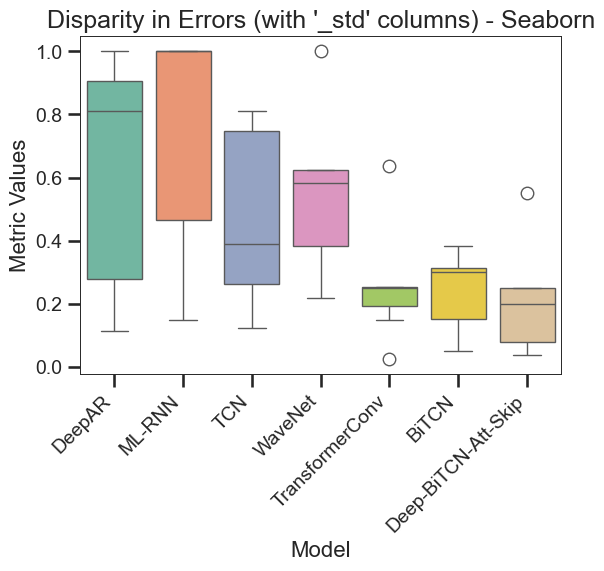

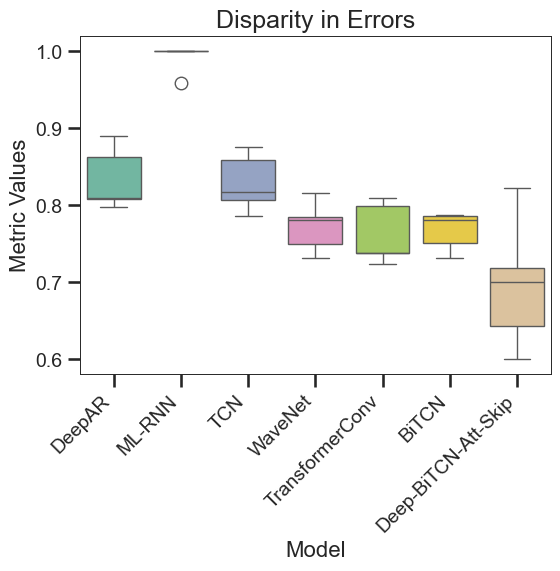

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Desired order for sorting
model_order = ['DeepAR', 'ML-RNN', 'TCN', 'WaveNet', 'TransformerConv', 'BiTCN', 'Deep-BiTCN-Att-Skip']

# Function to sort DataFrame by the specified model order
def sort_by_model(df):
    df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
    return df.sort_values('Model')

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set Seaborn context to control font scaling globally
sns.set_context("talk", font_scale=0.9)  # Adjust the font scale here (try 0.8 or smaller)
sns.set_style("white")  # Removes extra borders
# Remove top and right border (spines)
sns.despine()
sns.set_style("ticks")  # Keeps only axis ticks

# Function to create and save a Seaborn box plot with adjusted font sizes
def plot_seaborn_boxplots(df, title, save_path=None):
    df = sort_by_model(df)
    melted_df = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

    plt.figure(figsize=(6, 6))  # Adjust figure size
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.7)  # Adjust border thickness (default is ~1.0)
    ax = sns.boxplot(data=melted_df, x='Model', y='Value', palette='Set2')

    # Set font sizes explicitly
    plt.title(title, fontsize=18)  # Reduce title size
    plt.xlabel('Model', fontsize=16)  # Reduce x-axis label size
    plt.ylabel('Metric Values', fontsize=16)  # Reduce y-axis label size
    plt.xticks(fontsize=14, rotation=45, ha="right")  # Reduce x-axis tick font size
    plt.yticks(fontsize=14)  # Reduce y-axis tick font size

    # Adjust font size for labels inside the boxplot (median, whiskers, etc.)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='jpeg', dpi=300)

# Sort and plot for each DataFrame, saving the plots as JPEG
df_with_std_sorted = sort_by_model(df_with_std)
df_without_std_sorted = sort_by_model(df_without_std)

plot_seaborn_boxplots(df_with_std_sorted, 
                      "Disparity in Errors (with '_std' columns) - Seaborn", 
                      save_path="disparity_with_std.jpg")

plot_seaborn_boxplots(df_without_std_sorted, 
                      "Disparity in Errors", 
                      save_path="disparity_without_std.jpg")


/tmp/ipykernel_2305180/2125470983.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time', data=df, palette='viridis')


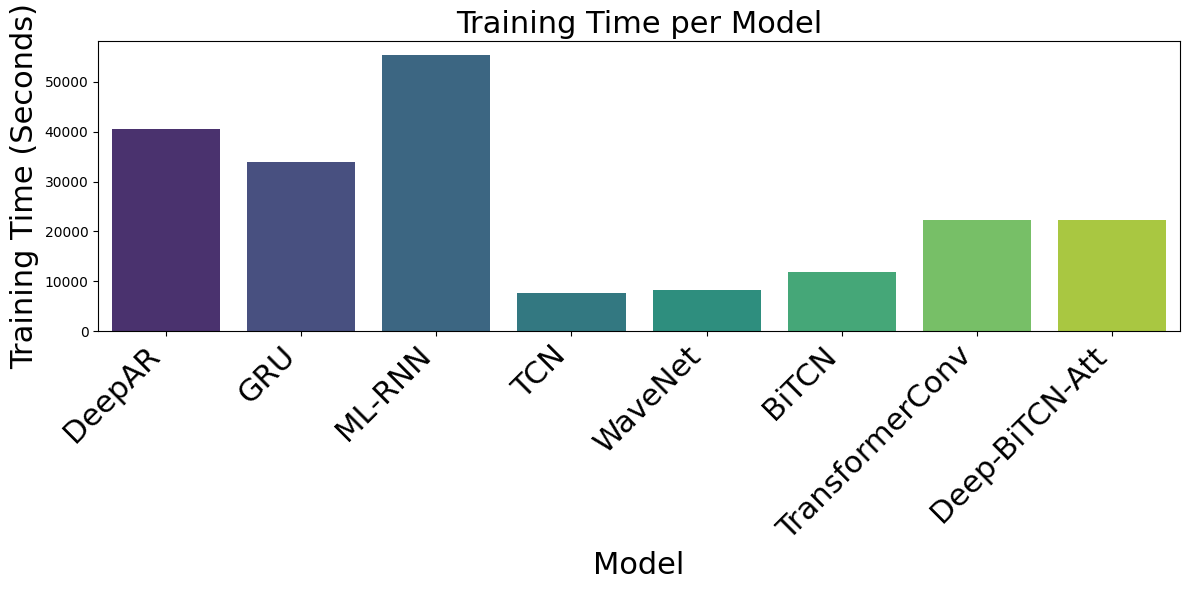

Chart saved as 'Training_Time_per_Model.jpeg'.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the specified models and training times
data = {
    "Model": [
        "DeepAR", "GRU", "ML-RNN", "TCN", "WaveNet", 
        "BiTCN", "TransformerConv", "Deep-BiTCN-Att"
    ],
    "Training Time": [
        40549, 33980, 55342, 7557, 8174, 
        11828, 22265, 22342
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Training Time', data=df, palette='viridis')
plt.xlabel('Model', fontsize=22)
plt.ylabel('Training Time (Seconds)', fontsize=22)
plt.title('Training Time per Model', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=22)
plt.tight_layout()

# Save the chart as a JPEG file
plt.savefig('Training_Time_per_Model.jpeg', format='jpeg', dpi=300)
plt.show()

print("Chart saved as 'Training_Time_per_Model.jpeg'.")


/tmp/ipykernel_2305180/1570104185.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset/Method', y='No. parameters', data=df, palette='viridis')


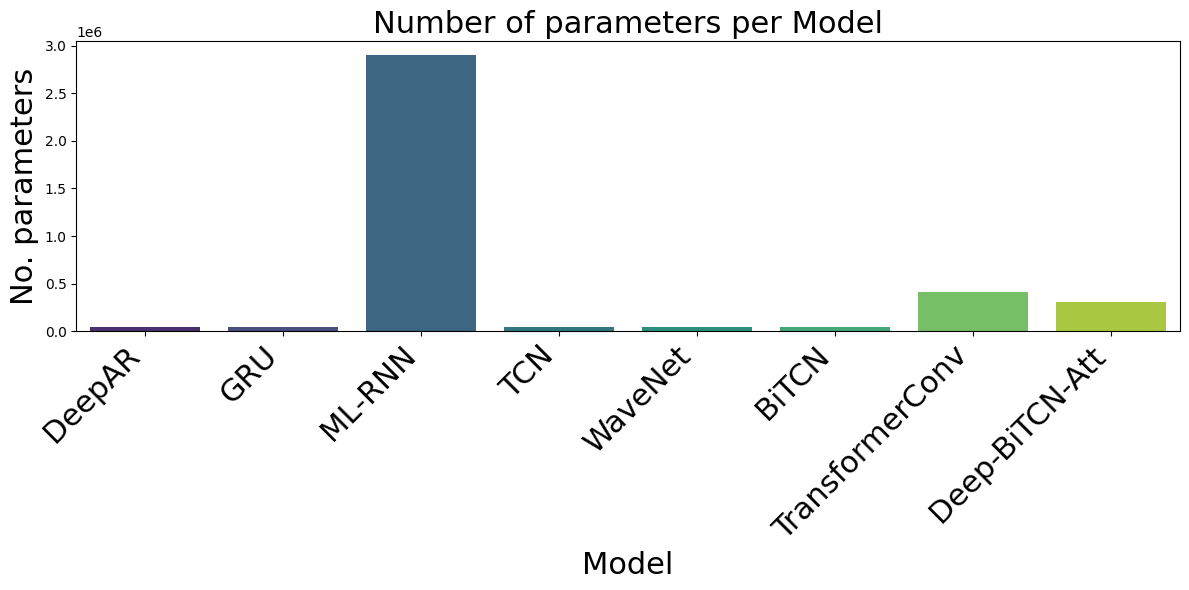

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data to mimic the table
data = {
    "Dataset/Method": [
        "Seasonal naive", "ETS", "Theta", "LightGBM", "DeepAR",
        "GRU", "ML-RNN", "TCN", "WaveNet", "BiTCN",
        "TransformerConv", "Deep-BiTCN-Att"
    ],
    "No. parameters": [0, "100k", "20k", "2M", "45k", "45k", "2.9M", "46k", "48k", "49k", "415k", "309k"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'No. parameters' to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    return float(value)

df["No. parameters"] = df["No. parameters"].apply(convert_to_numeric)

# Filter rows from 'DeepAR' to 'Deep-BiTCN-Att'
df = df.loc[df["Dataset/Method"].isin(["DeepAR", "GRU", "ML-RNN", "TCN", "WaveNet", "BiTCN", "TransformerConv", "Deep-BiTCN-Att"])]

# Plotting a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Dataset/Method', y='No. parameters', data=df, palette='viridis')
plt.xlabel('Model', fontsize=22)
plt.ylabel('No. parameters', fontsize=22)
plt.title('Number of parameters per Model', fontsize=22)
plt.xticks(rotation=45, ha='right', fontsize=22)
plt.tight_layout()

# Save the chart as a JPEG file
plt.savefig('No_parameters_fixed.jpeg', format='jpeg', dpi=300)
plt.show()




/tmp/ipykernel_2305180/1933756485.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Model', y='Training Time', data=df_training, palette='viridis')
/tmp/ipykernel_2305180/1933756485.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_training["Model"], rotation=45, fontsize=10)
/tmp/ipykernel_2305180/1933756485.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Model', y='No. parameters', data=df_params, palette='viridis')


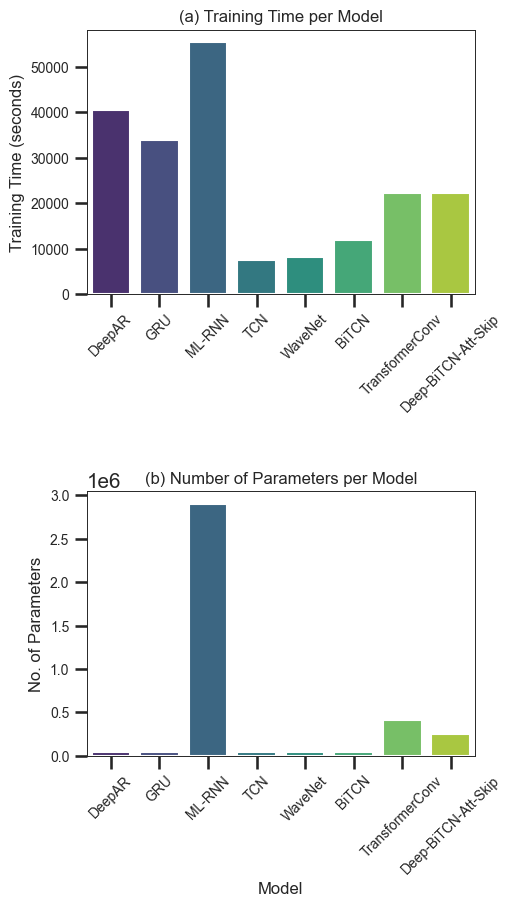

Chart saved as 'Training_Time_and_Parameters_narrow.jpeg'.


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired order of models
model_order = ["DeepAR", "GRU", "ML-RNN", "TCN", "WaveNet", 
               "BiTCN", "TransformerConv", "Deep-BiTCN-Att-Skip"]

# Data for Training Time
df_training = pd.DataFrame({
    "Model": model_order,
    "Training Time": [40549, 33980, 55342, 7557, 8174, 11828, 22265, 22342]
})

# Data for Number of Parameters
df_params = pd.DataFrame({
    "Model": ["Seasonal naive", "ETS", "Theta", "LightGBM", "DeepAR", "GRU", "ML-RNN",
              "TCN", "WaveNet", "BiTCN", "TransformerConv", "Deep-BiTCN-Att-Skip"],
    "No. parameters": [0, "100k", "20k", "2M", "45k", "45k", "2.9M", "46k", "48k", "49k", "415k", "254k"]
})

# Convert 'No. parameters' to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        return float(value.replace('k', '')) * 1e3 if 'k' in value else float(value.replace('M', '')) * 1e6
    return float(value)

df_params["No. parameters"] = df_params["No. parameters"].apply(convert_to_numeric)
df_params = df_params[df_params["Model"].isin(model_order)]

# Set categorical order and sort
for df in [df_training, df_params]:
    df["Model"] = pd.Categorical(df["Model"], categories=model_order, ordered=True)
    df.sort_values("Model", inplace=True)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharex=True)  # Slightly wider for better spacing

# Adjust border thickness for each subplot
for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(0.7)

# Training Time Plot
sns.barplot(ax=axes[0], x='Model', y='Training Time', data=df_training, palette='viridis')
axes[0].set_ylabel('Training Time (seconds)', fontsize=12)
axes[0].set_title('(a) Training Time per Model', fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].tick_params(labelbottom=True)  # Force x-axis labels to be shown

# Explicitly set x-tick labels for the top subplot
axes[0].set_xticklabels(df_training["Model"], rotation=45, fontsize=10)

# Number of Parameters Plot
sns.barplot(ax=axes[1], x='Model', y='No. parameters', data=df_params, palette='viridis')
axes[1].set_ylabel('No. of Parameters', fontsize=12)
axes[1].set_title('(b) Number of Parameters per Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_xlabel('Model', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
# Improve spacing and avoid overlap
plt.tight_layout(pad=2.5)

# Save and show
plt.savefig('Training_Time_and_Parameters_narrow.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved as 'Training_Time_and_Parameters_narrow.jpeg'.")


In [12]:
data = {
    "d_hidden": [10, 15, 20, 25, 30],
    "NRMSE": [0.550101, 0.525195, 0.520547, 0.498195, 0.504818],
    "SMAPE": [0.102991, 0.099703, 0.093569, 0.093870, 0.091522],
    "MAPE": [0.111006, 0.111323, 0.102329, 0.097951, 0.096160],
    "RMSE": [1437.08508, 1372.02062, 1359.87680, 1301.48568, 1318.78774],
    "ND": [0.063204, 0.061233, 0.059895, 0.058804, 0.058636],
    "Q50": [0.063204, 0.061233, 0.059895, 0.058804, 0.058636],
    "meanQ": [0.052009, 0.050592, 0.049807, 0.048737, 0.048738],
    "params": [49.692, 99.037, 167.182, 254.127, 359.872]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Errors from TransformerConv model
transformerconv_errors = {
    "NRMSE": 0.660,
    "SMAPE": 0.084,
    "MAPE": 0.105,
    "RMSE": 1755,
    "ND": 0.062,
    "Q50": 0.062,
    "meanQ": 0.052
}

bitcn_errors = {
    "SMAPE": 0.089,
    "NRMSE": 0.641,
    "ND": 0.0631,
    "RMSE": 1705,
    "MAPE": 0.106,
    "Q50": 0.063,
    "meanQ": 0.052
}


# Compare each metric and determine if they are smaller than TransformerConv's errors
metrics = ["NRMSE", "SMAPE", "MAPE", "RMSE", "ND", "Q50", "meanQ"]

# Count how many metrics are smaller for each row compared to transformer values
df['rank_against_transformer'] = df.apply(lambda row: 1 if sum(row[metric] < transformerconv_errors[metric] for metric in metrics) > len(metrics) / 2 else 2, axis=1)

# Count how many metrics are smaller for each row compared to transformer values
df['rank_against_bitcn'] = df.apply(lambda row: 1 if sum(row[metric] < bitcn_errors[metric] for metric in metrics) > len(metrics) / 2 else 2, axis=1)

# Display the updated DataFrame
df

,d_hidden,NRMSE,SMAPE,MAPE,RMSE,ND,Q50,meanQ,params,rank_against_transformer,rank_against_bitcn
0,10,0.550101,0.102991,0.111006,1437.08508,0.063204,0.063204,0.052009,49.692,2,2
1,15,0.525195,0.099703,0.111323,1372.02062,0.061233,0.061233,0.050592,99.037,1,1
2,20,0.520547,0.093569,0.102329,1359.87680,0.059895,0.059895,0.049807,167.182,1,1
3,25,0.498195,0.093870,0.097951,1301.48568,0.058804,0.058804,0.048737,254.127,1,1
4,30,0.504818,0.091522,0.096160,1318.78774,0.058636,0.058636,0.048738,359.872,1,1


In [13]:


#TransformerConv 0.084  0.660  0.062  1755 0.105  0.062 0.052 




# Maximum values from the previous DataFrame
max_values = {
    "NRMSE": df["NRMSE"].max(),
    "SMAPE": df["SMAPE"].max(),
    "MAPE": df["MAPE"].max(),
    "RMSE": df["RMSE"].max(),
    "ND": df["ND"].max(),
    "Q50": df["Q50"].max(),
    "meanQ": df["meanQ"].max()
}

# Normalize TransformerConv errors
normalized_errors = {key: transformerconv_errors[key] / max_values[key] for key in transformerconv_errors}
normalized_errors

{'NRMSE': 1.1997796768229836,
 'SMAPE': 0.8156052470604228,
 'MAPE': 0.9432013150921192,
 'RMSE': 1.2212220587524296,
 'ND': 0.9809505727485602,
 'Q50': 0.9809505727485602,
 'meanQ': 0.9998269530273606}

In [14]:
columns_to_scale = ["NRMSE", "SMAPE", "MAPE", "RMSE", "ND", "Q50", "meanQ"]

# Scale each column by dividing by its max value
for col in columns_to_scale:
    df[col] = df[col] / df[col].max()

# Display the dataframe
df


,d_hidden,NRMSE,SMAPE,MAPE,RMSE,ND,Q50,meanQ,params,rank_against_transformer,rank_against_bitcn
0,10,1.000000,1.000000,0.997152,1.000000,1.000000,1.000000,1.000000,49.692,2,2
1,15,0.954725,0.968075,1.000000,0.954725,0.968815,0.968815,0.972755,99.037,1,1
2,20,0.946275,0.908516,0.919208,0.946274,0.947646,0.947646,0.957661,167.182,1,1
3,25,0.905643,0.911439,0.879881,0.905643,0.930384,0.930384,0.937088,254.127,1,1
4,30,0.917682,0.888641,0.863793,0.917682,0.927726,0.927726,0.937107,359.872,1,1


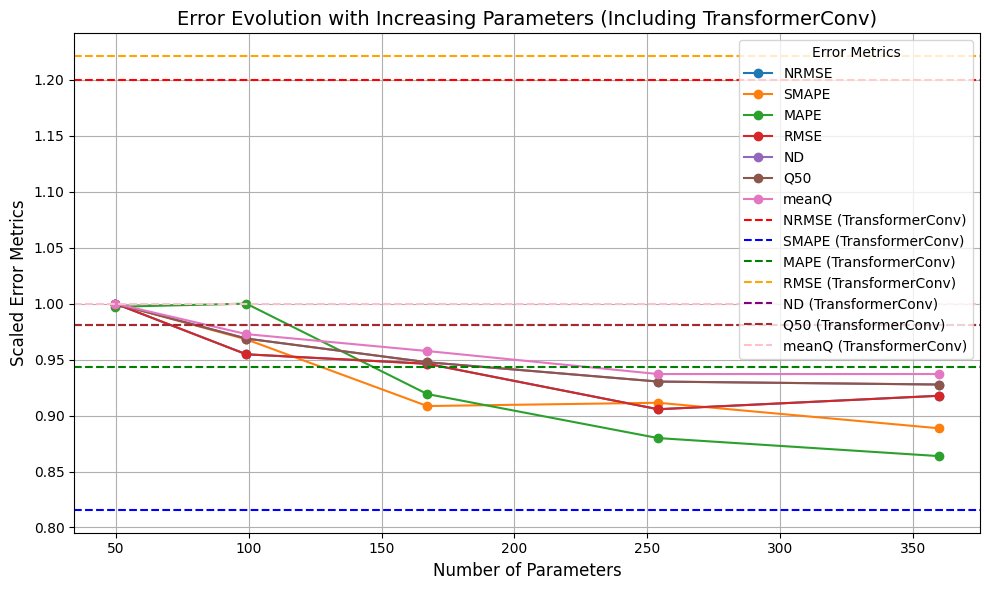

In [15]:
import matplotlib.pyplot as plt

# Normalized errors from TransformerConv
transformerconv_normalized_errors = {
    'NRMSE': 1.1997796768229836,
    'SMAPE': 0.8156052470604228,
    'MAPE': 0.9432013150921192,
    'RMSE': 1.2212220587524296,
    'ND': 0.9809505727485602,
    'Q50': 0.9809505727485602,
    'meanQ': 0.9998269530273606
}

# Error metrics to plot
error_metrics = ["NRMSE", "SMAPE", "MAPE", "RMSE", "ND", "Q50", "meanQ"]

# Plot each metric against the number of parameters
plt.figure(figsize=(10, 6))
for metric in error_metrics:
    plt.plot(df["params"], df[metric], label=metric, marker='o')

# Add horizontal lines for TransformerConv errors with different colors and dashes
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
for idx, (metric, value) in enumerate(transformerconv_normalized_errors.items()):
    plt.axhline(y=value, linestyle='--', color=colors[idx % len(colors)], label=f'{metric} (TransformerConv)')

# Customize the plot
plt.title("Error Evolution with Increasing Parameters (Including TransformerConv)", fontsize=14)
plt.xlabel("Number of Parameters", fontsize=12)
plt.ylabel("Scaled Error Metrics", fontsize=12)
plt.legend(title="Error Metrics", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


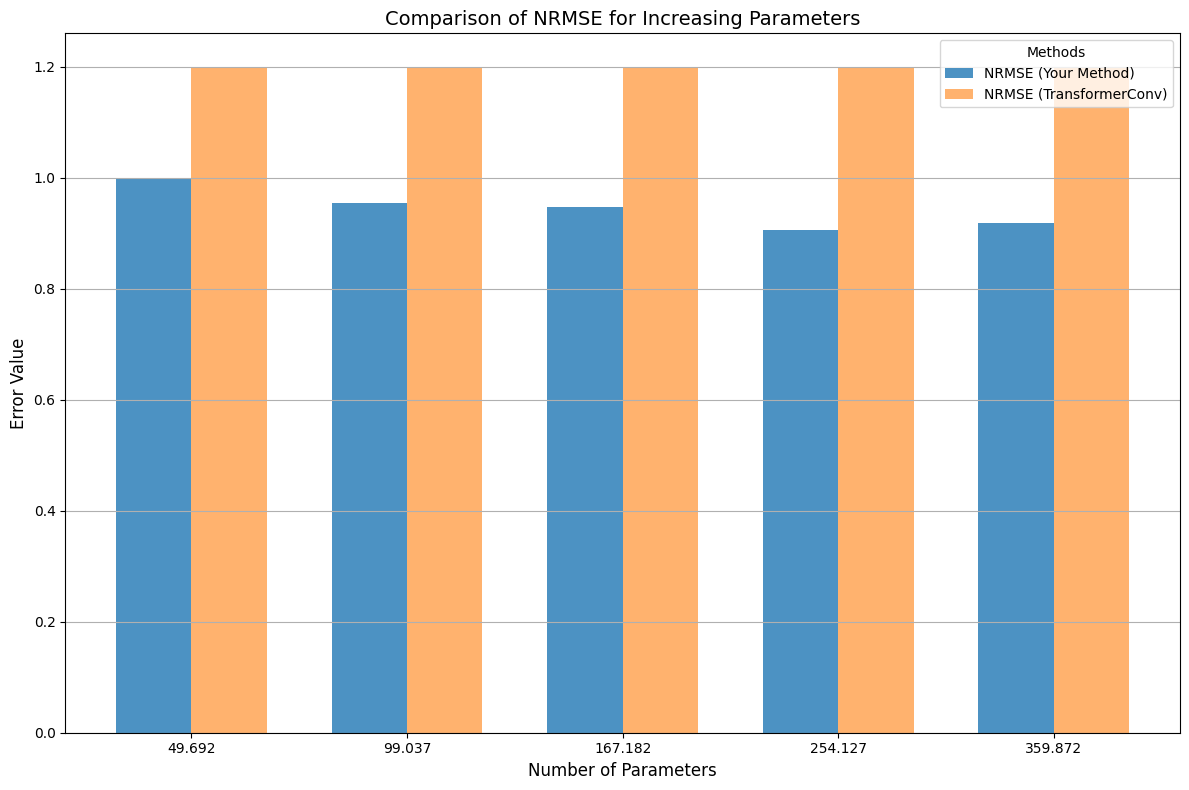

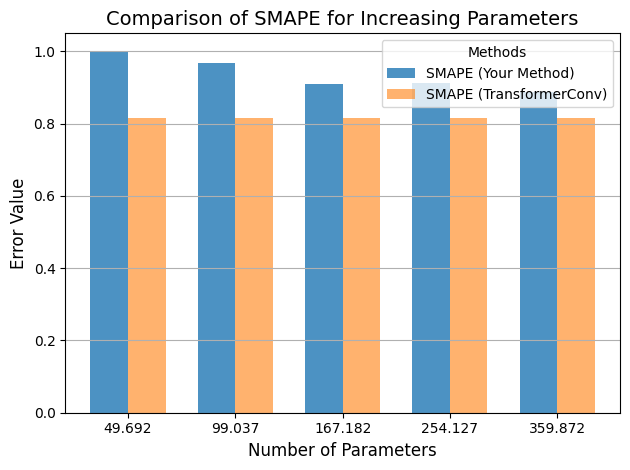

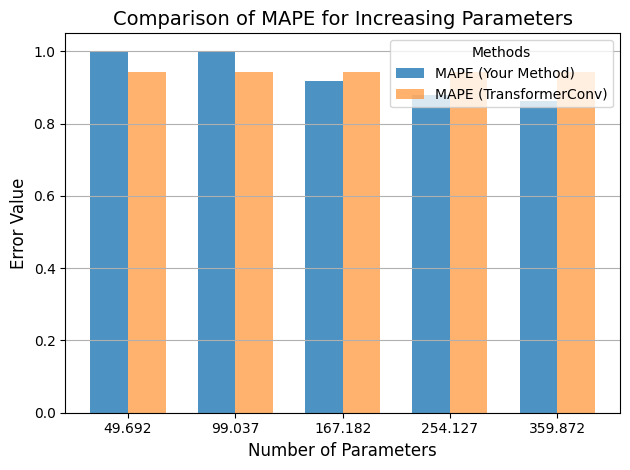

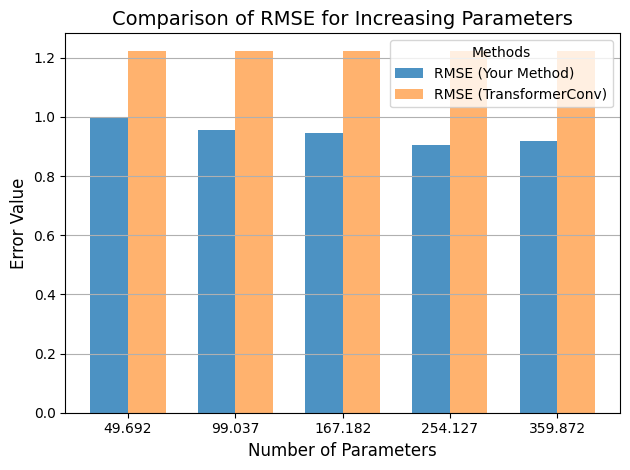

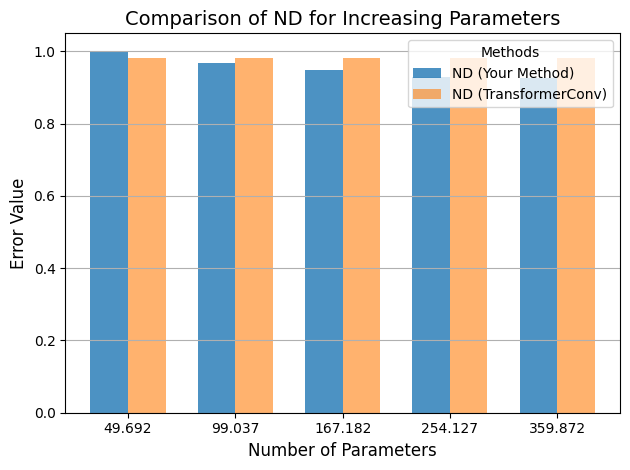

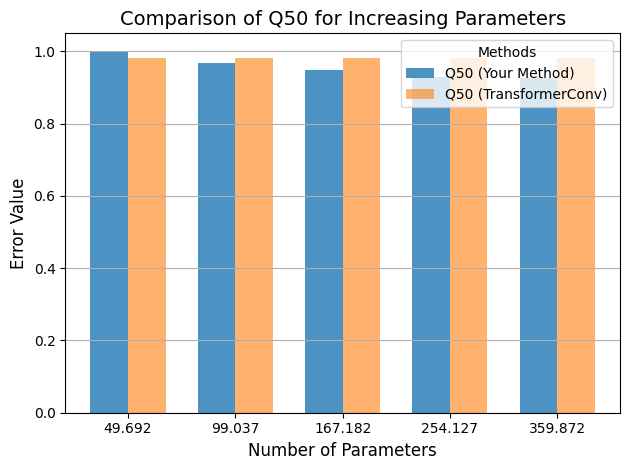

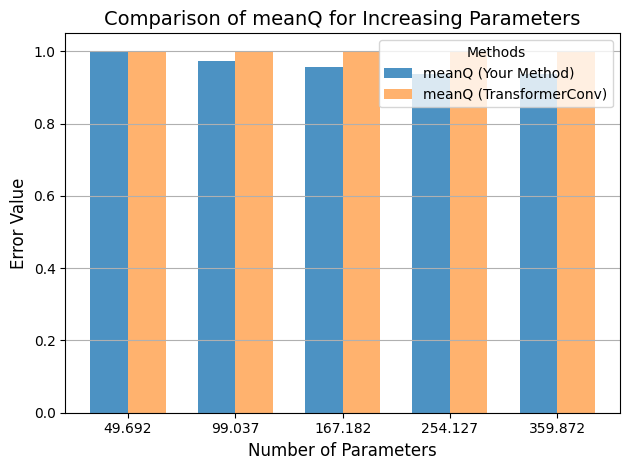

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with TransformerConv errors for comparison
transformerconv_df = pd.DataFrame(
    {metric: [value] * len(df["params"]) for metric, value in transformerconv_normalized_errors.items()}
)

# Plot error metrics as grouped bar charts
x = np.arange(len(df["params"]))  # Positions for the groups
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 8))

for idx, metric in enumerate(error_metrics):
    plt.bar(
        x - width/2, 
        df[metric], 
        width, 
        label=f'{metric} (Your Method)',
        alpha=0.8
    )
    plt.bar(
        x + width/2, 
        transformerconv_df[metric], 
        width, 
        label=f'{metric} (TransformerConv)', 
        alpha=0.6
    )
    plt.xticks(ticks=x, labels=df["params"], fontsize=10)
    plt.title(f"Comparison of {metric} for Increasing Parameters", fontsize=14)
    plt.xlabel("Number of Parameters", fontsize=12)
    plt.ylabel("Error Value", fontsize=12)
    plt.legend(title="Methods")
    plt.grid(axis="y")
    plt.tight_layout()

    # Show one graph for each metric
    plt.show()


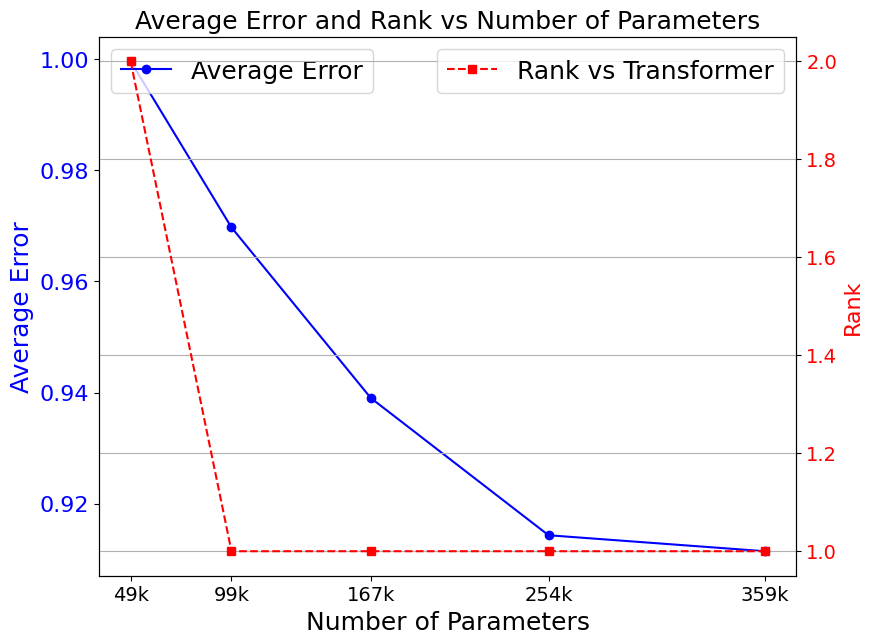

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
data = {
    "d_hidden": [10, 15, 20, 25, 30],
    "NRMSE": [1.000000, 0.954725, 0.946275, 0.905643, 0.917682],
    "SMAPE": [1.000000, 0.968075, 0.908516, 0.911439, 0.888641],
    "MAPE": [0.997152, 1.000000, 0.919208, 0.879881, 0.863793],
    "RMSE": [1.000000, 0.954725, 0.946274, 0.905643, 0.917682],
    "ND": [1.000000, 0.968815, 0.947646, 0.930384, 0.927726],
    "Q50": [1.000000, 0.968815, 0.947646, 0.930384, 0.927726],
    "meanQ": [1.000000, 0.972755, 0.957661, 0.937088, 0.937107],
    "params": [49.692, 99.037, 167.182, 254.127, 359.872],
    "rank_against_transformer": [2, 1, 1, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the average of the error metrics
error_metrics = ["NRMSE", "SMAPE", "MAPE", "RMSE", "ND", "Q50", "meanQ"]
df["average_error"] = df[error_metrics].mean(axis=1)

# Increase font size globally
plt.rcParams.update({'font.size': 22})

# Plotting
fig, ax1 = plt.subplots(figsize=(9, 7))

# Plot average error vs number of parameters
ax1.plot(df["params"], df["average_error"], 'o-', color='blue', label='Average Error')
ax1.set_xlabel('Number of Parameters', fontsize=18)
ax1.set_ylabel('Average Error', color='blue', fontsize=18)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)

# Format x-axis labels to show 'k' suffix
ax1.set_xticks(df["params"])
ax1.set_xticklabels([f"{int(val)}k" for val in df["params"]], fontsize=14)

# Create a second y-axis to plot rank against TransformerConv only
ax2 = ax1.twinx()
ax2.plot(df["params"], df["rank_against_transformer"], 's--', color='red', label='Rank vs Transformer')
ax2.set_ylabel('Rank', color='red', fontsize=16)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

# Add legends
ax1.legend(loc='upper left', fontsize=18)
ax2.legend(loc='upper right', fontsize=18)

# Title and layout adjustments
plt.title('Average Error and Rank vs Number of Parameters', fontsize=18)
plt.grid()

# Save the figure as a JPEG file
plt.savefig("average_error_vs_params.jpeg", format='jpeg', dpi=300)

# Show the plot
plt.show()
